<a href="https://colab.research.google.com/github/Mahedi-Hasan-Anik/Thesis_materials/blob/main/neural_net1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
# Create a MOdel class that inherits nn.Module
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

  def forward(self,x):
    #relu=rectified linear unit
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [ ]:
torch.manual_seed(41)
model=Model()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [ ]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [ ]:
X=X.values
y=y.values

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)



In [ ]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [ ]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
criterion =nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epochs=500
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch:{i} and loss:{loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0 and loss:0.9741887450218201
Epoch:10 and loss:0.9723936915397644
Epoch:20 and loss:0.9705868363380432
Epoch:30 and loss:0.9687598943710327
Epoch:40 and loss:0.966912567615509
Epoch:50 and loss:0.9650452733039856
Epoch:60 and loss:0.9631579518318176
Epoch:70 and loss:0.9612503051757812
Epoch:80 and loss:0.9593238830566406
Epoch:90 and loss:0.9573774933815002
Epoch:100 and loss:0.9554054141044617
Epoch:110 and loss:0.9534123539924622
Epoch:120 and loss:0.9513974785804749
Epoch:130 and loss:0.949359118938446
Epoch:140 and loss:0.9472973942756653
Epoch:150 and loss:0.9452114701271057
Epoch:160 and loss:0.943101167678833
Epoch:170 and loss:0.940966010093689
Epoch:180 and loss:0.9388056397438049
Epoch:190 and loss:0.9366195201873779
Epoch:200 and loss:0.9344087839126587
Epoch:210 and loss:0.9321730136871338
Epoch:220 and loss:0.9299104809761047
Epoch:230 and loss:0.9276226758956909
Epoch:240 and loss:0.9253107309341431
Epoch:250 and loss:0.9229758977890015
Epoch:260 and loss:0.920613

Text(0.5, 0, 'Epoch')

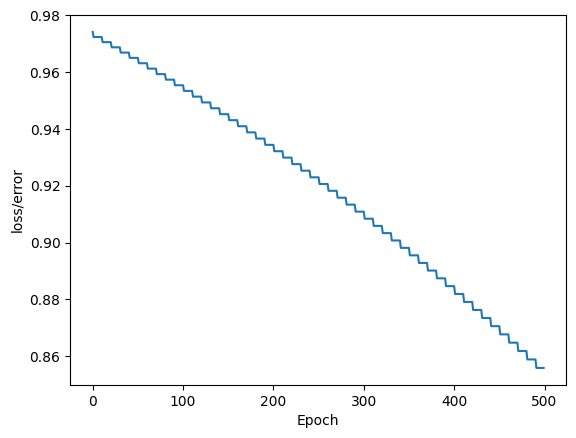

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")